## MED 2.1

## Optipization -

In [ ]:
import numpy as np
import time
import psutil
import os
from tqdm import tqdm  

def edit_distance(s1, s2):
    len1, len2 = len(s1), len(s2)
    dp = np.zeros((len1 + 1, len2 + 1), dtype=int)
    iterations = 0 

    for i in range(len1 + 1):
        dp[i][0] = i
    for j in range(len2 + 1):
        dp[0][j] = j

    for i in range(1, len1 + 1):
        for j in range(1, len2 + 1):
            iterations += 1 
            cost = 0 if s1[i-1] == s2[j-1] else 1
            dp[i][j] = min(dp[i-1][j] + 1,      #deletion
                           dp[i][j-1] + 1,      #insertion
                           dp[i-1][j-1] + cost) #substitution
    return dp[len1][len2], iterations

def compute_all_edit_distances(word, word_list):
    distances = []
    total_iterations = 0
    total_words_checked = 0

    process = psutil.Process(os.getpid())
    cpu_start = process.cpu_times()
    mem_start = process.memory_info().rss

    start_time = time.time()

    for w in tqdm(word_list, desc="Calculating edit distances"):
        dist, iterations = edit_distance(word, w)
        distances.append((w, dist))
        total_iterations += iterations
        total_words_checked += 1

    end_time = time.time()

    cpu_end = process.cpu_times()
    mem_end = process.memory_info().rss

    elapsed_time = end_time - start_time
    cpu_time_user = cpu_end.user - cpu_start.user
    cpu_time_system = cpu_end.system - cpu_start.system
    mem_usage_mb = (mem_end - mem_start) / (1024 * 1024)

    distances_sorted = sorted(distances, key=lambda x: x[1])
    min_distance = distances_sorted[0][1]
    min_words = [w for w, d in distances_sorted if d == min_distance]

    resource_usage = {
        "elapsed_time_sec": elapsed_time,
        "cpu_time_user_sec": cpu_time_user,
        "cpu_time_system_sec": cpu_time_system,
        "memory_usage_mb": mem_usage_mb
    }

    return distances_sorted, min_distance, min_words, total_iterations, total_words_checked, resource_usage

def read_words_from_file(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return [line.strip() for line in f if line.strip()]

if __name__ == "__main__":
    word_list = read_words_from_file("big.txt")
    target_word = input("Enter the target word: ").strip()

    sorted_distances, min_dist, closest_words, total_iterations, total_words_checked, resource_usage = compute_all_edit_distances(target_word, word_list)

    print(f"\nMinimum edit distance: {min_dist}")
    print("Words with minimum distance:")
    for w in closest_words:
        print(f"- {w}")

    print(f"\nTotal character comparisons (edit distance iterations): {total_iterations}")
    print(f"Total words checked: {total_words_checked}")
    print(f"Elapsed wall time (seconds): {resource_usage['elapsed_time_sec']:.6f}")
    print(f"CPU time user (seconds): {resource_usage['cpu_time_user_sec']:.6f}")
    print(f"CPU time system (seconds): {resource_usage['cpu_time_system_sec']:.6f}")
    print(f"Memory usage change (MB): {resource_usage['memory_usage_mb']:.6f}")

    #use for instance ვოწუხებდუთ


Calculating edit distances: 100%|██████████| 314541/314541 [00:40<00:00, 7732.82it/s]



Minimum edit distance: 2
Words with minimum distance:
- ვიწუხებდეთ

Total character comparisons (edit distance iterations): 28807640
Total words checked: 314541
Elapsed wall time (seconds): 40.679046
CPU time user (seconds): 40.650000
CPU time system (seconds): 0.570000
Memory usage change (MB): 29.281250


## Optimization +

In [ ]:
import numpy as np
import time
import psutil
import os
from tqdm import tqdm 

def edit_distance(s1, s2):
    len1, len2 = len(s1), len(s2)
    dp = np.zeros((len1 + 1, len2 + 1), dtype=int)
    iterations = 0  

    for i in range(len1 + 1):
        dp[i][0] = i
    for j in range(len2 + 1):
        dp[0][j] = j

    for i in range(1, len1 + 1):
        for j in range(1, len2 + 1):
            iterations += 1 
            cost = 0 if s1[i-1] == s2[j-1] else 1
            dp[i][j] = min(dp[i-1][j] + 1,      # delletion
                           dp[i][j-1] + 1,      #insertion
                           dp[i-1][j-1] + cost) #substitution
    return dp[len1][len2], iterations

def generate_words_from_patterns(lemma, filename):
    words = []
    try:
        with open(filename, 'r', encoding='utf-8') as f:
            for line in f:
                pattern = line.strip()
                if not pattern:
                    continue
                # '#' placeholder with lemma
                word = pattern.replace('#', lemma)
                words.append(word)
    except FileNotFoundError:
        print(f"Warning: file '{filename}' not found. Using empty word list.")
    return words

def compute_all_edit_distances(word, word_list):
    distances = []
    total_iterations = 0
    total_words_checked = 0

    process = psutil.Process(os.getpid())
    cpu_start = process.cpu_times()
    mem_start = process.memory_info().rss

    start_time = time.time()

   
    for w in tqdm(word_list, desc="Calculating edit distances"):
        dist, iterations = edit_distance(word, w)
        distances.append((w, dist))
        total_iterations += iterations
        total_words_checked += 1

    end_time = time.time()

    cpu_end = process.cpu_times()
    mem_end = process.memory_info().rss

    elapsed_time = end_time - start_time
    cpu_time_user = cpu_end.user - cpu_start.user
    cpu_time_system = cpu_end.system - cpu_start.system
    mem_usage_mb = (mem_end - mem_start) / (1024 * 1024)  

    distances_sorted = sorted(distances, key=lambda x: x[1])
    min_distance = distances_sorted[0][1]
    min_words = [w for w, d in distances_sorted if d == min_distance]

    resource_usage = {
        "elapsed_time_sec": elapsed_time,
        "cpu_time_user_sec": cpu_time_user,
        "cpu_time_system_sec": cpu_time_system,
        "memory_usage_mb": mem_usage_mb
    }

    return distances_sorted, min_distance, min_words, total_iterations, total_words_checked, resource_usage

def read_words_from_file(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return [line.strip() for line in f if line.strip()]

if __name__ == "__main__":
    target_word = input("Enter the target word: ").strip()

    if "წუხ" in target_word:
        word_list = generate_words_from_patterns("წუხ", "wux.txt")
    elif "ყეფ" in target_word:
        word_list = generate_words_from_patterns("ყეფ", "yef.txt")
    else:
        word_list = read_words_from_file("big.txt")

    sorted_distances, min_dist, closest_words, total_iterations, total_words_checked, resource_usage = compute_all_edit_distances(target_word, word_list)

    print(f"\nMinimum edit distance: {min_dist}")
    print("Words with minimum distance:")
    for w in closest_words:
        print(f"- {w}")

    print(f"\nTotal character comparisons (edit distance iterations): {total_iterations}")
    print(f"Total words checked: {total_words_checked}")
    print(f"Elapsed time (seconds): {resource_usage['elapsed_time_sec']:.6f}")
    print(f"CPU time user (seconds): {resource_usage['cpu_time_user_sec']:.6f}")
    print(f"CPU time system (seconds): {resource_usage['cpu_time_system_sec']:.6f}")
    print(f"Memory usage change (MB): {resource_usage['memory_usage_mb']:.6f}")

    #use for instance ვოწუხებდუთ


Calculating edit distances: 100%|██████████| 66/66 [00:00<00:00, 3821.27it/s]


Minimum edit distance: 2
Words with minimum distance:
- ვიწუხებდით
- ვიწუხებდეთ

Total character comparisons (edit distance iterations): 4540
Total words checked: 66
Elapsed time (seconds): 0.025385
CPU time user (seconds): 0.020000
CPU time system (seconds): 0.000000
Memory usage change (MB): 0.000000


## Naive Bayas

2.2 optimized -

In [5]:
from collections import defaultdict
import math

def read_documents(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return [line.strip() for line in f if line.strip()]

pos_docs = read_documents("positive_words_ka.txt") 
neg_docs = read_documents("negative_words_ka.txt")  

train_data = [(doc, "pos") for doc in pos_docs] + [(doc, "neg") for doc in neg_docs]
total_docs = len(train_data)

class_word_counts = defaultdict(lambda: defaultdict(int))
class_doc_counts = defaultdict(int)
vocab = set()

for doc, cls in train_data:
    class_doc_counts[cls] += 1
    for word in doc.lower().split():
        class_word_counts[cls][word] += 1
        vocab.add(word)

vocab_size = len(vocab)
class_total_words = {cls: sum(words.values()) for cls, words in class_word_counts.items()}
priors = {cls: count / total_docs for cls, count in class_doc_counts.items()}

def classify(doc):
    tokens = doc.lower().split()
    log_probs = {}

    for cls in class_doc_counts:
        log_prob = math.log(priors[cls])
        total_words = class_total_words[cls]

        for token in tokens:
            word_count = class_word_counts[cls].get(token, 0)
            prob = (word_count + 1) / (total_words + vocab_size)
            log_prob += math.log(prob)

        log_probs[cls] = log_prob

    # Normalize
    raw_probs = {cls: math.exp(score) for cls, score in log_probs.items()}
    total = sum(raw_probs.values())
    normalized_probs = {cls: prob / total for cls, prob in raw_probs.items()}

    return max(log_probs, key=log_probs.get), log_probs, normalized_probs

test_doc = input("Enter the test document: ").strip()
predicted_class, log_probs, normalized_probs = classify(test_doc)

print(f"\nTest document: {test_doc}")

print("\nLog probabilities:")
for cls in log_probs:
    print(f"Class {cls}: {log_probs[cls]:.4f}")

print("\nNormalized probabilities:")
for cls in normalized_probs:
    print(f"Class {cls}: {normalized_probs[cls]:.4f}")

print(f"\nPredicted class: {predicted_class}")

# წუხ and its forms are included in this version
# check this in both of versions: დედები წუხდნენ ძალიან და წუხდა შვილიც



Test document: დედები წუხდნენ ძალიან და წუხდა შვილიც

Log probabilities:
Class pos: -34.7996
Class neg: -34.8100

Normalized probabilities:
Class pos: 0.5026
Class neg: 0.4974

Predicted class: pos


## 2.3 optimized +

In [6]:
from collections import defaultdict
import math
import os

def read_documents(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return [line.strip() for line in f if line.strip()]

def generate_words_from_patterns(lemma, filename):
    words = []
    if not os.path.exists(filename):
        return words
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            pattern = line.strip()
            if '#' in pattern:
                words.append(pattern.replace('#', lemma))
    return words

pos_docs = read_documents("positive_words_ka.txt")  # class 'pos'
neg_docs = read_documents("negative_words_ka.txt")  # class 'neg'

train_data = [(doc, "pos") for doc in pos_docs] + [(doc, "neg") for doc in neg_docs]
total_docs = len(train_data)

class_word_counts = defaultdict(lambda: defaultdict(int))
class_doc_counts = defaultdict(int)
vocab = set()

for doc, cls in train_data:
    class_doc_counts[cls] += 1
    for word in doc.lower().split():
        class_word_counts[cls][word] += 1
        vocab.add(word)

vocab_size = len(vocab)
class_total_words = {cls: sum(words.values()) for cls, words in class_word_counts.items()}
priors = {cls: count / total_docs for cls, count in class_doc_counts.items()}

# Naive Bayes with Laplace smoothing and extension for "წუხ"
def classify(doc):
    tokens = doc.lower().split()
    log_probs = {}

    for i, token in enumerate(tokens):
        if "წუხ" in token and token not in class_word_counts['neg']:
            found_in_class = any("წუხ" in w for w in class_word_counts['neg'])
            if found_in_class:
                synthetic_words = generate_words_from_patterns("წუხ", "wux.txt")
                if token in synthetic_words:
                    class_word_counts['neg'][token] += 1
                    class_total_words['neg'] += 1
                    vocab.add(token)
                    vocab_size = len(vocab)

    for cls in class_doc_counts:
        log_prob = math.log(priors[cls])
        total_words = class_total_words[cls]

        for token in tokens:
            word_count = class_word_counts[cls].get(token, 0)
            prob = (word_count + 1) / (total_words + vocab_size)
            log_prob += math.log(prob)

        log_probs[cls] = log_prob

    raw_probs = {cls: math.exp(score) for cls, score in log_probs.items()}
    total = sum(raw_probs.values())
    normalized_probs = {cls: prob / total for cls, prob in raw_probs.items()}

    return max(log_probs, key=log_probs.get), log_probs, normalized_probs

test_doc = input("Enter the test document: ").strip()
predicted_class, log_probs, normalized_probs = classify(test_doc)

# Output
print(f"\nTest document: {test_doc}")
print("\nLog probabilities:")
for cls in log_probs:
    print(f"Class {cls}: {log_probs[cls]:.4f}")

print("\nNormalized probabilities:")
for cls in normalized_probs:
    print(f"Class {cls}: {normalized_probs[cls]:.4f}")

print(f"\nPredicted class: {predicted_class}")

# წუხ and its forms are included in this version
# check this in both of versions: დედები წუხდნენ ძალიან და წუხდა შვილიც


Test document: დედები წუხდნენ ძალიან და წუხდა შვილიც

Log probabilities:
Class pos: -34.8403
Class neg: -33.5046

Normalized probabilities:
Class pos: 0.2082
Class neg: 0.7918

Predicted class: neg


## LM 2.4

## Optimized -

In [10]:
from collections import defaultdict

def tokenize(text):
    return text.lower().split()

def read_corpus_from_file(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return [line.strip() for line in f if line.strip()]

def train_bigram_model(corpus):
    unigram_counts = defaultdict(int)
    bigram_counts = defaultdict(int)
    vocab = set()

    for sentence in corpus:
        tokens = tokenize(sentence)
        for i in range(len(tokens)):
            vocab.add(tokens[i])
            unigram_counts[tokens[i]] += 1
            if i > 0:
                bigram = (tokens[i-1], tokens[i])
                bigram_counts[bigram] += 1

    V = len(vocab)
    return unigram_counts, bigram_counts, V

def laplace_bigram_prob(w_prev, w_curr, unigram_counts, bigram_counts, V):
    bigram = (w_prev, w_curr)
    count_bigram = bigram_counts[bigram]
    count_unigram = unigram_counts[w_prev]
    return (count_bigram + 1) / (count_unigram + V)

def raw_bigram_prob(w_prev, w_curr, unigram_counts, bigram_counts):
    bigram = (w_prev, w_curr)
    count_bigram = bigram_counts[bigram]
    count_unigram = unigram_counts[w_prev]
    if count_unigram == 0:
        return 0.0
    return count_bigram / count_unigram

if __name__ == "__main__":
    corpus = read_corpus_from_file("corpus.txt") 

    unigrams, bigrams, vocab_size = train_bigram_model(corpus)

    w1 = input("Enter the previous word (w1): ").strip().lower()
    w2 = input("Enter the current word (w2): ").strip().lower()

    laplace_prob = laplace_bigram_prob(w1, w2, unigrams, bigrams, vocab_size)
    raw_prob = raw_bigram_prob(w1, w2, unigrams, bigrams)

    print(f"\nBigram: {w1} {w2}")
    print(f"Raw probability (MLE): P({w2} | {w1}) = {raw_prob:.6f}")
    print(f"Laplace-smoothed probability: P({w2} | {w1}) = {laplace_prob:.6f}")



Bigram: <s> ვოიტეკ
Raw probability (MLE): P(ვოიტეკ | <s>) = 0.000000
Laplace-smoothed probability: P(ვოიტეკ | <s>) = 0.002695


## Optimized +

In [9]:
from collections import defaultdict
import os

def tokenize(text):
    return text.lower().split()

def read_corpus_from_file(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return [line.strip().lower() for line in f if line.strip()]

def train_bigram_model(corpus):
    unigram_counts = defaultdict(int)
    bigram_counts = defaultdict(int)
    vocab = set()

    for sentence in corpus:
        tokens = tokenize(sentence)
        for i in range(len(tokens)):
            vocab.add(tokens[i])
            unigram_counts[tokens[i]] += 1
            if i > 0:
                bigram = (tokens[i-1], tokens[i])
                bigram_counts[bigram] += 1

    V = len(vocab)
    return unigram_counts, bigram_counts, V

def read_wux_forms(filename, stem="წუხ"):
    forms = []
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            pattern = line.strip()
            if "#" in pattern:
                wordform = pattern.replace("#", stem)
                forms.append(wordform.lower()) 
    return forms

def morphologically_smoothed_prob(w1, w2, unigram_counts, bigram_counts, V, N_r, lambda_=0.7):
    bigram_actual = (w1, w2)
    count_bigram_actual = bigram_counts[bigram_actual]
    count_w1 = unigram_counts[w1]

    numerator = count_bigram_actual + 1
    denominator = count_w1 + V
    p_context = numerator / denominator
    p_morph = 1 / N_r if N_r > 0 else 0
    final_prob = lambda_ * p_context + (1 - lambda_) * p_morph

    # Verbose output
    print("\n[INFO] Morphologically-informed smoothing activated:")
    print(f"- Wordform: {w2}")
    print(f"- Bigram count ({w1}, {w2}) = {count_bigram_actual}")
    print(f"- Unigram count ({w1}) = {count_w1}")
    print(f"- Vocabulary size |V| = {V}")
    print(f"- Morphological forms N_r = {N_r}")
    print(f"- Lambda = {lambda_}")
    print(f"- Context component: ({count_bigram_actual} + 1) / ({count_w1} + {V}) = {p_context:.6f}")
    print(f"- Morphological component: 1 / {N_r} = {p_morph:.6f}")
    print(f"- Final formula: {lambda_:.2f} * {p_context:.6f} + {1 - lambda_:.2f} * {p_morph:.6f}")
    print(f"- Final result: P({w2} | {w1}) = {final_prob:.6f}")

    return final_prob

if __name__ == "__main__":
    corpus = read_corpus_from_file("corpus.txt")
    unigrams, bigrams, vocab_size = train_bigram_model(corpus)

    w1 = input("Enter the previous word (w1): ").strip().lower()
    w2 = input("Enter the current word (w2): ").strip().lower()

    root = "წუხ"
    lambda_ = 0.7

    if root in w2:
        if os.path.exists("wux.txt"):
            derived_forms = read_wux_forms("wux.txt", stem=root)
            if w2 in derived_forms:
                N_r = len(derived_forms) 
                prob = morphologically_smoothed_prob(w1, w2, unigrams, bigrams, vocab_size, N_r, lambda_)
                print(f"\nBigram: {w1} {w2}")
                print(f"Morphologically-informed probability: P({w2} | {w1}) = {prob:.6f}")
            else:
                print(f"\n[INFO] '{w2}' contains '{root}' but is not found in derived forms. No smoothing applied.")
        else:
            print(f"\n[WARNING] '{w2}' contains '{root}' but 'wux.txt' file not found.")
    else:
        N_r = 1000  # fallback for non-წუხ words
        prob = morphologically_smoothed_prob(w1, w2, unigrams, bigrams, vocab_size, N_r, lambda_)
        print(f"\nBigram: {w1} {w2}")
        print(f"Fallback smoothed probability (N_r=1000): P({w2} | {w1}) = {prob:.6f}")



[INFO] Morphologically-informed smoothing activated:
- Wordform: წუხხარ
- Bigram count (<s>, წუხხარ) = 0
- Unigram count (<s>) = 9
- Vocabulary size |V| = 362
- Morphological forms N_r = 66
- Lambda = 0.7
- Context component: (0 + 1) / (9 + 362) = 0.002695
- Morphological component: 1 / 66 = 0.015152
- Final formula: 0.70 * 0.002695 + 0.30 * 0.015152
- Final result: P(წუხხარ | <s>) = 0.006432

Bigram: <s> წუხხარ
Morphologically-informed probability: P(წუხხარ | <s>) = 0.006432


## Embeddings 2.5

P.S. - The code provided below, up to the section titled "Embeddings' distribution calculation" does not belong to the author of the current article.

In [11]:
file = open('OOV_case.txt', 'r')
royal_data = file.readlines()
print(royal_data)
file.close()

['\n', 'ვწუხვარ, რომ ეს მოხდა.\n', '\n', 'ნამდვილად ვწუხვარ, თუ გაწყენინე.\n', '\n', 'გულწრფელად ვწუხვარ შენი მდგომარეობის გამო.\n', '\n', 'ვწუხვარ, რომ ვერ შევხვდით.\n', '\n', 'ვწუხვარ, მაგრამ ეს იყო საჭირო.\n', '\n', 'ვწუხვარ ასეთი შედეგის გამო.\n', '\n', 'ვწუხვარ, თუ ასე იფიქრე.\n', '\n', 'ვწუხვარ და თან ვნერვიულობ.\n', '\n', 'ვწუხვარ, რომ ასე დასრულდა.\n', '\n', 'ვწუხვარ, თუ სხვანაირად წარმოგედგინა.\n', '\n', '\n', 'ყველანი ვწუხვართ მომხდარის გამო.\n', '\n', 'ვწუხვართ, რომ ეს რეალობაა.\n', '\n', 'ვწუხვართ, თუ ასე მოხდა.\n', '\n', 'ვწუხვართ, რომ ვერ დავეხმარეთ.\n', '\n', 'ვწუხვართ ამ უსიამოვნო ამბის გამო.\n', '\n', 'გულწრფელად ვწუხვართ ამის გამო.\n', '\n', 'ვწუხვართ, მაგრამ სხვა გამოსავალი არ იყო.\n', '\n', 'ვწუხვართ, რომ ვერ შევინარჩუნეთ კონტაქტი.\n', '\n', 'ვწუხვართ, თუ რამე დაგვაკლდა.\n', '\n', 'მეგობრებთან ერთად ვწუხვართ მის გამო.\n', '\n', '\n', 'რატომ წუხხარ ასე?\n', '\n', 'ვხედავ, რომ წუხხარ.\n', '\n', 'გთხოვ, ნუ წუხხარ.\n', '\n', 'შენზე ვნერვიულობ, როცა ასე წუხხარ.\n', '\n',

In [12]:
for i in range(len(royal_data)):
    royal_data[i] = royal_data[i].lower().replace('\n', '')
    royal_data[i] = royal_data[i].lower().replace(',', '')
    royal_data[i] = royal_data[i].lower().replace('?', '')
    royal_data[i] = royal_data[i].lower().replace('.', '')
    royal_data[i] = royal_data[i].lower().replace('—', '')

print(royal_data)                                                      


['', 'ვწუხვარ რომ ეს მოხდა', '', 'ნამდვილად ვწუხვარ თუ გაწყენინე', '', 'გულწრფელად ვწუხვარ შენი მდგომარეობის გამო', '', 'ვწუხვარ რომ ვერ შევხვდით', '', 'ვწუხვარ მაგრამ ეს იყო საჭირო', '', 'ვწუხვარ ასეთი შედეგის გამო', '', 'ვწუხვარ თუ ასე იფიქრე', '', 'ვწუხვარ და თან ვნერვიულობ', '', 'ვწუხვარ რომ ასე დასრულდა', '', 'ვწუხვარ თუ სხვანაირად წარმოგედგინა', '', '', 'ყველანი ვწუხვართ მომხდარის გამო', '', 'ვწუხვართ რომ ეს რეალობაა', '', 'ვწუხვართ თუ ასე მოხდა', '', 'ვწუხვართ რომ ვერ დავეხმარეთ', '', 'ვწუხვართ ამ უსიამოვნო ამბის გამო', '', 'გულწრფელად ვწუხვართ ამის გამო', '', 'ვწუხვართ მაგრამ სხვა გამოსავალი არ იყო', '', 'ვწუხვართ რომ ვერ შევინარჩუნეთ კონტაქტი', '', 'ვწუხვართ თუ რამე დაგვაკლდა', '', 'მეგობრებთან ერთად ვწუხვართ მის გამო', '', '', 'რატომ წუხხარ ასე', '', 'ვხედავ რომ წუხხარ', '', 'გთხოვ ნუ წუხხარ', '', 'შენზე ვნერვიულობ როცა ასე წუხხარ', '', 'მგონი ზედმეტად წუხხარ', '', 'ხანდახან წუხხარ როცა ყველაფერი რიგზეა', '', 'წუხხარ იმაზე რაც აღარ დაბრუნდება', '', 'მართლა წუხხარ თუ უბრალოდ გ

In [13]:
stopwords = [',','?','.']

filtered_data = []
for sent in royal_data:
    temp = []
    for word in sent.split():
        if word not in stopwords:
            temp.append(word)
    filtered_data.append(temp)

print(filtered_data)

[[], ['ვწუხვარ', 'რომ', 'ეს', 'მოხდა'], [], ['ნამდვილად', 'ვწუხვარ', 'თუ', 'გაწყენინე'], [], ['გულწრფელად', 'ვწუხვარ', 'შენი', 'მდგომარეობის', 'გამო'], [], ['ვწუხვარ', 'რომ', 'ვერ', 'შევხვდით'], [], ['ვწუხვარ', 'მაგრამ', 'ეს', 'იყო', 'საჭირო'], [], ['ვწუხვარ', 'ასეთი', 'შედეგის', 'გამო'], [], ['ვწუხვარ', 'თუ', 'ასე', 'იფიქრე'], [], ['ვწუხვარ', 'და', 'თან', 'ვნერვიულობ'], [], ['ვწუხვარ', 'რომ', 'ასე', 'დასრულდა'], [], ['ვწუხვარ', 'თუ', 'სხვანაირად', 'წარმოგედგინა'], [], [], ['ყველანი', 'ვწუხვართ', 'მომხდარის', 'გამო'], [], ['ვწუხვართ', 'რომ', 'ეს', 'რეალობაა'], [], ['ვწუხვართ', 'თუ', 'ასე', 'მოხდა'], [], ['ვწუხვართ', 'რომ', 'ვერ', 'დავეხმარეთ'], [], ['ვწუხვართ', 'ამ', 'უსიამოვნო', 'ამბის', 'გამო'], [], ['გულწრფელად', 'ვწუხვართ', 'ამის', 'გამო'], [], ['ვწუხვართ', 'მაგრამ', 'სხვა', 'გამოსავალი', 'არ', 'იყო'], [], ['ვწუხვართ', 'რომ', 'ვერ', 'შევინარჩუნეთ', 'კონტაქტი'], [], ['ვწუხვართ', 'თუ', 'რამე', 'დაგვაკლდა'], [], ['მეგობრებთან', 'ერთად', 'ვწუხვართ', 'მის', 'გამო'], [], [], ['რატომ', 'წ

In [14]:
bigrams = []
for words_list in filtered_data:
    for i in range(len(words_list) - 1):
        for j in range(i+1, len(words_list)):
            bigrams.append([words_list[i], words_list[j]])
            bigrams.append([words_list[j], words_list[i]])
            

print(bigrams)

[['ვწუხვარ', 'რომ'], ['რომ', 'ვწუხვარ'], ['ვწუხვარ', 'ეს'], ['ეს', 'ვწუხვარ'], ['ვწუხვარ', 'მოხდა'], ['მოხდა', 'ვწუხვარ'], ['რომ', 'ეს'], ['ეს', 'რომ'], ['რომ', 'მოხდა'], ['მოხდა', 'რომ'], ['ეს', 'მოხდა'], ['მოხდა', 'ეს'], ['ნამდვილად', 'ვწუხვარ'], ['ვწუხვარ', 'ნამდვილად'], ['ნამდვილად', 'თუ'], ['თუ', 'ნამდვილად'], ['ნამდვილად', 'გაწყენინე'], ['გაწყენინე', 'ნამდვილად'], ['ვწუხვარ', 'თუ'], ['თუ', 'ვწუხვარ'], ['ვწუხვარ', 'გაწყენინე'], ['გაწყენინე', 'ვწუხვარ'], ['თუ', 'გაწყენინე'], ['გაწყენინე', 'თუ'], ['გულწრფელად', 'ვწუხვარ'], ['ვწუხვარ', 'გულწრფელად'], ['გულწრფელად', 'შენი'], ['შენი', 'გულწრფელად'], ['გულწრფელად', 'მდგომარეობის'], ['მდგომარეობის', 'გულწრფელად'], ['გულწრფელად', 'გამო'], ['გამო', 'გულწრფელად'], ['ვწუხვარ', 'შენი'], ['შენი', 'ვწუხვარ'], ['ვწუხვარ', 'მდგომარეობის'], ['მდგომარეობის', 'ვწუხვარ'], ['ვწუხვარ', 'გამო'], ['გამო', 'ვწუხვარ'], ['შენი', 'მდგომარეობის'], ['მდგომარეობის', 'შენი'], ['შენი', 'გამო'], ['გამო', 'შენი'], ['მდგომარეობის', 'გამო'], ['გამო', 'მდგომარეობის'],

In [15]:
all_words = []
for bi in bigrams:
    all_words.extend(bi)

all_words = list(set(all_words))
all_words.sort()

print(all_words)
print("Total number of unique words are:", len(all_words))

['აგრძელებდით', 'ადამიანია', 'ადრე', 'აისახა', 'აისახება', 'ალბათ', 'ამ', 'ამაზე', 'ამას', 'ამბის', 'ამბობდა', 'ამბობდი', 'ამდენად', 'ამდენზე', 'ამის', 'არ', 'არა', 'არაა', 'არავინ', 'არავის', 'არამარტო', 'არასდროს', 'არაფერზე', 'არაფერი', 'არაფერს', 'არის', 'არჩევანით', 'არც', 'ასე', 'ასეთი', 'ასეც', 'ატყობინებს', 'აუცილებელი', 'აღარ', 'აღარასდროს', 'აშკარად', 'აჩვენებდნენ', 'აჩვენებენ', 'ახალი', 'ახლა', 'ბავშვებზე', 'ბავშვები', 'ბავშვების', 'ბავშვობაში', 'ბევრ', 'ბევრზე', 'ბევრი', 'ბოლოს', 'ბრძოლა', 'ბრძოლის', 'ბუნებრივია', 'გადავრჩეთ', 'გადავწყვიტოთ', 'გადაწყვეტილება', 'გადაწყვეტილების', 'გავიგეთ', 'გავიმარჯვეთ', 'გავხდით', 'გაიხსნა', 'გამო', 'გამოსავალი', 'გამოსავალს', 'გამოსწორდება', 'გამოჩნდება', 'გამოცდებზე', 'გამოცდების', 'განსაკუთრებით', 'განსხვავებულ', 'განცალკევებით', 'გაძლება', 'გაწუხებთ', 'გაწყენინე', 'გაჭირვებულებზე', 'გგონია', 'გეტყობოდა', 'გეუბნებოდი', 'გეჩვენება', 'გვაძლევს', 'გვინდოდა', 'გვქონდა', 'გვქონდეთ', 'გვყოფნიდა', 'გვყოფნის', 'გვჭირდება', 'გვჯეროდეს', 'გზები',

In [16]:
words_dict = {}

counter = 0
for word in all_words:
    words_dict[word] = counter
    counter += 1

print(words_dict)

{'აგრძელებდით': 0, 'ადამიანია': 1, 'ადრე': 2, 'აისახა': 3, 'აისახება': 4, 'ალბათ': 5, 'ამ': 6, 'ამაზე': 7, 'ამას': 8, 'ამბის': 9, 'ამბობდა': 10, 'ამბობდი': 11, 'ამდენად': 12, 'ამდენზე': 13, 'ამის': 14, 'არ': 15, 'არა': 16, 'არაა': 17, 'არავინ': 18, 'არავის': 19, 'არამარტო': 20, 'არასდროს': 21, 'არაფერზე': 22, 'არაფერი': 23, 'არაფერს': 24, 'არის': 25, 'არჩევანით': 26, 'არც': 27, 'ასე': 28, 'ასეთი': 29, 'ასეც': 30, 'ატყობინებს': 31, 'აუცილებელი': 32, 'აღარ': 33, 'აღარასდროს': 34, 'აშკარად': 35, 'აჩვენებდნენ': 36, 'აჩვენებენ': 37, 'ახალი': 38, 'ახლა': 39, 'ბავშვებზე': 40, 'ბავშვები': 41, 'ბავშვების': 42, 'ბავშვობაში': 43, 'ბევრ': 44, 'ბევრზე': 45, 'ბევრი': 46, 'ბოლოს': 47, 'ბრძოლა': 48, 'ბრძოლის': 49, 'ბუნებრივია': 50, 'გადავრჩეთ': 51, 'გადავწყვიტოთ': 52, 'გადაწყვეტილება': 53, 'გადაწყვეტილების': 54, 'გავიგეთ': 55, 'გავიმარჯვეთ': 56, 'გავხდით': 57, 'გაიხსნა': 58, 'გამო': 59, 'გამოსავალი': 60, 'გამოსავალს': 61, 'გამოსწორდება': 62, 'გამოჩნდება': 63, 'გამოცდებზე': 64, 'გამოცდების': 65, 'განსა

In [17]:
import numpy as np

onehot_data = np.zeros((len(all_words), len(all_words)))

for i in range(len(all_words)):
    onehot_data[i][i] = 1

onehot_dict = {}
counter = 0
for word in all_words:
    onehot_dict[word] = onehot_data[counter]
    counter += 1

for word in onehot_dict:
    print(word, ":", onehot_dict[word])


აგრძელებდით : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [18]:
X = []
Y = []

for bi in bigrams:
    X.append(onehot_dict[bi[0]])
    Y.append(onehot_dict[bi[1]])
    
X = np.array(X)
Y = np.array(Y)

In [19]:
from keras.models import Sequential
from keras.layers import Dense

embed_size = 2

model = Sequential([
    Dense(embed_size, activation='linear'),
    Dense(Y.shape[1], activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')



2025-07-02 23:35:14.985383: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-02 23:35:15.050413: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-02 23:35:15.438640: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-02 23:35:15.441568: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-02 23:35:17.265450: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [20]:
model.fit(X, Y, epochs = 2500, batch_size = 256, verbose = False)

In [22]:
weights = model.get_weights()[0]

word_embeddings = {}
for word in all_words:
    word_embeddings[word] = weights[words_dict[word]]

# print(word_embeddings)

0.58685005 -3.7127037 აგრძელებდით
-0.6136187 -1.2980158 ადამიანია
0.6969809 0.3313226 ადრე
0.08529209 0.64588684 აისახა
-0.5865999 0.77201897 აისახება
-0.53346837 0.074250236 ალბათ
0.6736844 1.2033622 ამ
-1.7082821 0.8345609 ამაზე
0.26561248 -0.12235815 ამას
0.6997929 0.79039454 ამბის
1.5514042 -0.43080118 ამბობდა
-0.15136413 -0.46639323 ამბობდი
-3.782072 -0.40922707 ამდენად
-3.4133534 -1.6340014 ამდენზე
-0.4618298 0.24019921 ამის
-0.7848216 -0.053726707 არ
-0.760782 0.35832825 არა
-1.5652877 -1.7212838 არაა
1.9501741 -0.30197635 არავინ
-0.70260406 0.4321054 არავის
3.7762935 -3.8171413 არამარტო
0.8159024 0.5022816 არასდროს
-0.50515914 1.175197 არაფერზე
0.35192502 0.91354203 არაფერი
1.7665479 -0.35848275 არაფერს
-0.93516743 0.42911214 არის
0.65991455 0.9532854 არჩევანით
-5.728434 2.3875096 არც
-1.1708525 0.25830892 ასე
-0.34492633 0.79802877 ასეთი
-0.6390785 -2.2984252 ასეც
-0.50481987 0.6748878 ატყობინებს
-1.599369 -1.6992879 აუცილებელი
-7.2959995 -0.63156486 აღარ
0.7630543 0.18274789 

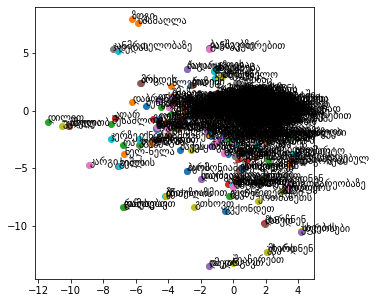

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
for word in list(words_dict.keys()):
    coord = word_embeddings.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))
    print(coord[0], coord[1],word)

Embeddings' distribution calculation

In [24]:
word_embeddings.get("ვწუხვარ")

array([-0.9456595 ,  0.30860454], dtype=float32)

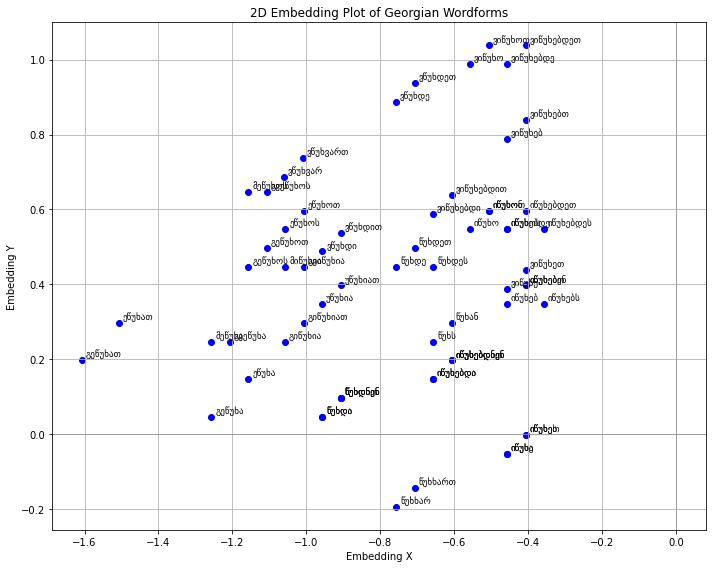

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
file_path = "wordform_to_morph.xlsx"
df = pd.read_excel(file_path)

root_emb= 0.8*word_embeddings.get("ვწუხვარ")

# morpheme vectors
morpheme_vectors = {
    "[0] ROOT (-წუხ-)":      root_emb, #80 %
    "[1] S1 (ვ-)":            [ 0.000, 0.441],
    "[2] P (-თ)":            [ 0.050, 0.050],
    "[3] PRES_S1 (-ვარ)":    [-0.303, 0.000],
    "[4] PRES_S2 (-ხარ)":    [ 0.000,-0.441],
    "[5] PRES_S3 (-ს)":      [ 0.100, 0.000],
    "[6] PRES_P3 (-ან)":     [ 0.150, 0.050],
    "[7] IMPF (-დი/-და)":    [-0.200,-0.200],
    "[8] IMPF_P3 (-ნენ)":    [-0.150,-0.150],
    "[9] SUBJ (-დე/-დეს)":   [ 0.000, 0.200],
    "[10] FUT_PRE (ი-)":     [ 0.100, 0.000],
    "[11] FUT_THEME (-ებ)":  [ 0.200, 0.100],
    "[12] FUT_P3 (-ენ)":     [ 0.250, 0.150],
    "[13] AOR (-ე/-ა)":      [ 0.200,-0.300],
    "[14] AOR_P3 (-ეს)":     [ 0.250,-0.250],
    "[15] OPT (-ო)":         [ 0.100, 0.300],
    "[16] OPT_P3 (-ონ)":     [ 0.150, 0.350],
    "[17] O1 (მ-/მე-)":      [ 0.000, 0.100],
    "[18] O1_PL (გვ-)":      [ 0.050, 0.100],
    "[19] O2 (გ-/გე-)":      [ 0.000,-0.100],
    "[20] O3 (უ-/ე-)":       [ 0.100, 0.000],
    "[21] PERF (-ია)":       [-0.400, 0.100],
    "[22] PERF_PL (-ათ)":    [-0.350, 0.150],
    "[23] PLUP (-ა)":        [-0.500,-0.100],
    "[24] PERF_SUBJ (-ოს)":  [-0.400, 0.300],
    "[25] PERF_SUBJ_PL (-ოთ)": [-0.350, 0.350],
}

embeddings = []
for idx, row in df.iterrows():
    vector = np.array([0.0, 0.0])
    for morpheme, vec in morpheme_vectors.items():
        if morpheme in row and row[morpheme] == 1:
            vector += np.array(vec)
    embeddings.append(vector)

df["Embedding_X"] = [vec[0] for vec in embeddings]
df["Embedding_Y"] = [vec[1] for vec in embeddings]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.scatter(df["Embedding_X"], df["Embedding_Y"], color='blue')

for _, row in df.iterrows():
    plt.text(row["Embedding_X"] + 0.01, row["Embedding_Y"] + 0.01, row["Wordform"], fontsize=9)

plt.title("2D Embedding Plot of Georgian Wordforms")
plt.xlabel("Embedding X")
plt.ylabel("Embedding Y")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('img1.jpg')

## Heuristic vectors' calculation

In [ ]:
import numpy as np
from pprint import pprint

def generate_morpheme_vectors(vtsukhvar_embedding: np.ndarray) -> dict:
    
    print("--- Starting Morpheme Vector Generation ---")
    
    #We use the heuristic formulas to solve for the three components of "ვწუხვარ".
    #Heuristic 1: The Root gets 80% of the vector's value.
    v_root = 0.8 * vtsukhvar_embedding
    print(f"\n[Step 1a] Calculated ROOT Vector (80%): {np.round(v_root, 4)}")

    #Heuristic 2: The remaining 20% is for the affixes.
    remainder = 0.2 * vtsukhvar_embedding
    
    #Heuristic 3: Split the remainder orthogonally for S1 and PRES_S1.
    #V(S1) gets the y-component, V(PRES_S1) gets the x-component.
    v_s1 = np.array([0, remainder[1]])
    v_pres_s1 = np.array([remainder[0], 0])
    print(f"[Step 1b] Calculated S1 Vector: {np.round(v_s1, 4)}")
    print(f"[Step 1c] Calculated PRES_S1 Vector: {np.round(v_pres_s1, 4)}")
    
    print("\n[Step 2] Defining all other vectors by analogy and design...")
    morpheme_vectors = {
        # --- ANCHORS 
        "[0] ROOT (-წუხ-)": v_root,
        "[1] S1 (ვ-)": v_s1,
        "[3] PRES_S1 (-ვარ)": v_pres_s1,
        
        # A. Person/Number Markers
        "[2] P (-თ)":            np.array([0.050, 0.050]),     #consistent plural vector
        "[4] PRES_S2 (-ხარ)":    -v_s1,                         #oopposite of S1
        "[5] PRES_S3 (-ს)":      np.array([0.100, 0.000]),      #simple horizontal modification
        "[6] PRES_P3 (-ან)":     np.array([0.150, 0.050]),
        "[17] O1 (მ-/მე-)":      np.array([0.000, 0.100]),
        "[18] O1_PL (გვ-)":      np.array([0.050, 0.100]),
        "[19] O2 (გ-/გე-)":      np.array([0.000,-0.100]),
        "[20] O3 (უ-/ე-)":       np.array([0.100, 0.000]),
        
        # B. Tense/Mood Markers
        "[7] IMPF (-დი/-და)":    np.array([-0.200,-0.200]),     
        "[8] IMPF_P3 (-ნენ)":    np.array([-0.150,-0.150]),
        "[9] SUBJ (-დე/-დეს)":   np.array([0.000, 0.200]),     
        "[10] FUT_PRE (ი-)":     np.array([0.100, 0.000]),
        "[11] FUT_THEME (-ებ)":  np.array([0.200, 0.100]),     
        "[12] FUT_P3 (-ენ)":     np.array([0.250, 0.150]),
        "[13] AOR (-ე/-ა)":      np.array([0.200,-0.300]),      
        "[14] AOR_P3 (-ეს)":     np.array([0.250,-0.250]),
        "[15] OPT (-ო)":         np.array([0.100, 0.300]),
        "[16] OPT_P3 (-ონ)":     np.array([0.150, 0.350]),
        
        # C. Perfect Series
        "[21] PERF (-ია)":       np.array([-0.400, 0.100]),     
        "[22] PERF_PL (-ათ)":    np.array([-0.350, 0.150]),
        "[23] PLUP (-ა)":        np.array([-0.500,-0.100]),
        "[24] PERF_SUBJ (-ოს)":  np.array([-0.400, 0.300]),
        "[25] PERF_SUBJ_PL (-ოთ)": np.array([-0.350, 0.350]),
    }
    
    print("\n--- Generation Complete ---")
    return morpheme_vectors

if __name__ == "__main__":
    #the only input required is the known embedding for "ვწუხვარ" (in this case)
    vtsukhvar_embedding = np.array([-1.5148239, 2.2045438])

    #full dictionary of 26 morpheme vectors
    generated_vectors = generate_morpheme_vectors(vtsukhvar_embedding)


    print("\nFinal Generated Morpheme Vectors:")
    print("=" * 35)

    for key in sorted(generated_vectors.keys(), key=lambda x: int(x.split('[')[1].split(']')[0])):
        vector = generated_vectors[key]
        print(f'"{key}": [{vector[0]:8.4f}, {vector[1]:8.4f}]')

--- Starting Morpheme Vector Generation ---

[Step 1a] Calculated ROOT Vector (80%): [-1.2119  1.7636]
[Step 1b] Calculated S1 Vector: [0.     0.4409]
[Step 1c] Calculated PRES_S1 Vector: [-0.303  0.   ]

[Step 2] Defining all other vectors by analogy and design...

--- Generation Complete ---

Final Generated Morpheme Vectors:
"[0] ROOT (-წუხ-)": [ -1.2119,   1.7636]
"[1] S1 (ვ-)": [  0.0000,   0.4409]
"[2] P (-თ)": [  0.0500,   0.0500]
"[3] PRES_S1 (-ვარ)": [ -0.3030,   0.0000]
"[4] PRES_S2 (-ხარ)": [ -0.0000,  -0.4409]
"[5] PRES_S3 (-ს)": [  0.1000,   0.0000]
"[6] PRES_P3 (-ან)": [  0.1500,   0.0500]
"[7] IMPF (-დი/-და)": [ -0.2000,  -0.2000]
"[8] IMPF_P3 (-ნენ)": [ -0.1500,  -0.1500]
"[9] SUBJ (-დე/-დეს)": [  0.0000,   0.2000]
"[10] FUT_PRE (ი-)": [  0.1000,   0.0000]
"[11] FUT_THEME (-ებ)": [  0.2000,   0.1000]
"[12] FUT_P3 (-ენ)": [  0.2500,   0.1500]
"[13] AOR (-ე/-ა)": [  0.2000,  -0.3000]
"[14] AOR_P3 (-ეს)": [  0.2500,  -0.2500]
"[15] OPT (-ო)": [  0.1000,   0.3000]
"[16] OPT

## Convert

In [27]:
data_text = """
-0.37478536 -1.2627563 ვიწუხე
0.19376588 1.3096607 ვიწუხებ
-1.2805015 2.1869826 ვიწუხებდე
-0.18563384 0.21243884 ვიწუხებდეთ
1.278124 0.5955597 ვიწუხებდი
1.6052307 0.111139074 ვიწუხებდით
1.0590993 -0.24572259 ვიწუხებთ
0.7368733 -1.0332078 ვიწუხეთ
-1.9332783 0.80638963 ვწუხდე
-0.28650567 -0.04119625 ვწუხდეთ
1.0569929 0.7036345 ვწუხდი
0.9426039 0.01648948 ვწუხდით
0.04455638 1.2842771 ვწუხვარ
0.49166518 1.1052606 ვწუხვართ
-0.9807922 0.54209083 იწუხდნენ
-1.3362045 -1.0508429 იწუხე
-0.40321678 0.69716465 იწუხებ
0.6921564 -0.72105306 იწუხებდა
-0.8934154 -0.007011633 იწუხებდე
-2.0615318 -0.4665707 იწუხებდეს
0.26418835 0.56713194 იწუხებდი
0.66534203 1.0198153 იწუხებდით
0.16862176 -0.5315093 იწუხებდნენ
1.560504 0.26882115 იწუხებენ
-0.68456805 -0.14739607 იწუხებთ
0.08723846 -1.3220185 იწუხებს
-0.5731743 -0.9123584 იწუხეთ
0.8046813 -0.50916004 წუხან
0.5606011 -0.67030436 წუხდა
-1.2932156 1.4431422 წუხდე
-2.0034897 1.3237722 წუხდეთ
-1.6096901 0.8863592 წუხდეს
0.9863898 0.6687156 წუხდი
0.8559851 0.9771945 წუხდით
0.33956078 -0.044038657 წუხდნენ
-0.20766889 1.4411722 წუხს
-0.053886008 2.6251957 წუხხარ
-0.8587419 1.3113058 წუხხართ
"""

embedding_dict = {}
for line in data_text.strip().split('\n'):
    x_str, y_str, word = line.split()
    embedding_dict[word] = [float(x_str), float(y_str)]

print(embedding_dict)


{'ვიწუხე': [-0.37478536, -1.2627563], 'ვიწუხებ': [0.19376588, 1.3096607], 'ვიწუხებდე': [-1.2805015, 2.1869826], 'ვიწუხებდეთ': [-0.18563384, 0.21243884], 'ვიწუხებდი': [1.278124, 0.5955597], 'ვიწუხებდით': [1.6052307, 0.111139074], 'ვიწუხებთ': [1.0590993, -0.24572259], 'ვიწუხეთ': [0.7368733, -1.0332078], 'ვწუხდე': [-1.9332783, 0.80638963], 'ვწუხდეთ': [-0.28650567, -0.04119625], 'ვწუხდი': [1.0569929, 0.7036345], 'ვწუხდით': [0.9426039, 0.01648948], 'ვწუხვარ': [0.04455638, 1.2842771], 'ვწუხვართ': [0.49166518, 1.1052606], 'იწუხდნენ': [-0.9807922, 0.54209083], 'იწუხე': [-1.3362045, -1.0508429], 'იწუხებ': [-0.40321678, 0.69716465], 'იწუხებდა': [0.6921564, -0.72105306], 'იწუხებდე': [-0.8934154, -0.007011633], 'იწუხებდეს': [-2.0615318, -0.4665707], 'იწუხებდი': [0.26418835, 0.56713194], 'იწუხებდით': [0.66534203, 1.0198153], 'იწუხებდნენ': [0.16862176, -0.5315093], 'იწუხებენ': [1.560504, 0.26882115], 'იწუხებთ': [-0.68456805, -0.14739607], 'იწუხებს': [0.08723846, -1.3220185], 'იწუხეთ': [-0.5731743, -

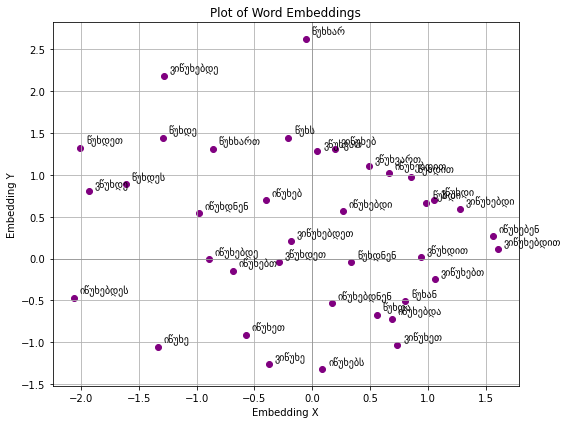

In [ ]:
import matplotlib.pyplot as plt

data = embedding_dict

plt.figure(figsize=(8, 6))
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)

for word, (x, y) in data.items():
    plt.scatter(x, y, color='purple')
    plt.text(x + 0.05, y + 0.05, word, fontsize=10)

plt.title("Plot of Word Embeddings")
plt.xlabel("Embedding X")
plt.ylabel("Embedding Y")
plt.grid(True)
plt.tight_layout()
# plt.savefig("word_embeddings_plot.jpg")  # Save to file
plt.show()


FastText case

In [ ]:
import pickle
import numpy as np
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def load_embeddings(pickle_file):
    with open(pickle_file, 'rb') as f:
        embeddings = pickle.load(f)
    return embeddings

def get_word_embedding(word, embeddings):
    return embeddings.get(word, None)  


def compute_similarity(embedding1, embedding2):
    if embedding1 is not None and embedding2 is not None:
        return 1 - cosine(embedding1, embedding2)
    return None


def visualize_embeddings_four(embedding1, embedding2, embedding3, embedding4, word1, word2, word3, word4):

    sim_12 = compute_similarity(embedding1, embedding2)
    sim_13 = compute_similarity(embedding1, embedding3)
    sim_14 = compute_similarity(embedding1, embedding4)
    sim_23 = compute_similarity(embedding2, embedding3)
    sim_24 = compute_similarity(embedding2, embedding4)
    sim_34 = compute_similarity(embedding3, embedding4)
    

    print(f"Similarity between '{word1}' and '{word2}': {sim_12:.4f}")
    print(f"Similarity between '{word1}' and '{word3}': {sim_13:.4f}")
    print(f"Similarity between '{word1}' and '{word4}': {sim_14:.4f}")
    print(f"Similarity between '{word2}' and '{word3}': {sim_23:.4f}")
    print(f"Similarity between '{word2}' and '{word4}': {sim_24:.4f}")
    print(f"Similarity between '{word3}' and '{word4}': {sim_34:.4f}")
    

    pca = PCA(n_components=2)
    embeddings = np.array([embedding1, embedding2, embedding3, embedding4])
    reduced_embeddings = pca.fit_transform(embeddings)

    plt.figure(figsize=(8, 8))
    colors = ['blue', 'red', 'green', 'orange']
    words = [word1, word2, word3, word4]
    
    for i, (word, color) in enumerate(zip(words, colors)):
        plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], color=color, label=word)
        plt.text(reduced_embeddings[i, 0] + 0.02, reduced_embeddings[i, 1], word, fontsize=12, color=color)
    

    plt.plot([reduced_embeddings[0, 0], reduced_embeddings[1, 0]], 
             [reduced_embeddings[0, 1], reduced_embeddings[1, 1]], 'k--', linewidth=0.8)
    plt.text((reduced_embeddings[0, 0] + reduced_embeddings[1, 0]) / 2,
             (reduced_embeddings[0, 1] + reduced_embeddings[1, 1]) / 2, f'{sim_12:.2f}', color='black')

    plt.plot([reduced_embeddings[0, 0], reduced_embeddings[2, 0]], 
             [reduced_embeddings[0, 1], reduced_embeddings[2, 1]], 'k--', linewidth=0.8)
    plt.text((reduced_embeddings[0, 0] + reduced_embeddings[2, 0]) / 2,
             (reduced_embeddings[0, 1] + reduced_embeddings[2, 1]) / 2, f'{sim_13:.2f}', color='black')

    plt.plot([reduced_embeddings[0, 0], reduced_embeddings[3, 0]], 
             [reduced_embeddings[0, 1], reduced_embeddings[3, 1]], 'k--', linewidth=0.8)
    plt.text((reduced_embeddings[0, 0] + reduced_embeddings[3, 0]) / 2,
             (reduced_embeddings[0, 1] + reduced_embeddings[3, 1]) / 2, f'{sim_14:.2f}', color='black')

    plt.plot([reduced_embeddings[1, 0], reduced_embeddings[2, 0]], 
             [reduced_embeddings[1, 1], reduced_embeddings[2, 1]], 'k--', linewidth=0.8)
    plt.text((reduced_embeddings[1, 0] + reduced_embeddings[2, 0]) / 2,
             (reduced_embeddings[1, 1] + reduced_embeddings[2, 1]) / 2, f'{sim_23:.2f}', color='black')

    plt.plot([reduced_embeddings[1, 0], reduced_embeddings[3, 0]], 
             [reduced_embeddings[1, 1], reduced_embeddings[3, 1]], 'k--', linewidth=0.8)
    plt.text((reduced_embeddings[1, 0] + reduced_embeddings[3, 0]) / 2,
             (reduced_embeddings[1, 1] + reduced_embeddings[3, 1]) / 2, f'{sim_24:.2f}', color='black')

    plt.plot([reduced_embeddings[2, 0], reduced_embeddings[3, 0]], 
             [reduced_embeddings[2, 1], reduced_embeddings[3, 1]], 'k--', linewidth=0.8)
    plt.text((reduced_embeddings[2, 0] + reduced_embeddings[3, 0]) / 2,
             (reduced_embeddings[2, 1] + reduced_embeddings[3, 1]) / 2, f'{sim_34:.2f}', color='black')

    plt.title(f"Semantic Embedding Space: '{word1}', '{word2}', '{word3}', '{word4}'")
    plt.xlabel('PCA Dimension 1')
    plt.ylabel('PCA Dimension 2')
    plt.legend()
    plt.grid(True)
    plt.show()


embeddings_en = load_embeddings('model_parts_ka/model_part_1.pkl') 
embeddings_ka = load_embeddings('model_parts_ka/model_part_1.pkl')  


word1 = 'წერა'   
word2 = 'უწუხია'  
word3 = 'დაწერა'     
word4 = 'დაწერილი'  

embedding1 = get_word_embedding(word1, embeddings_en)
embedding2 = get_word_embedding(word2, embeddings_en)
embedding3 = get_word_embedding(word3, embeddings_ka)
embedding4 = get_word_embedding(word4, embeddings_ka)

#visualize 
if embedding1 is not None and embedding2 is not None and embedding3 is not None and embedding4 is not None:
    visualize_embeddings_four(embedding1, embedding2, embedding3, embedding4, word1, word2, word3, word4)
else:
    print("One or more embeddings not found.")

mBERT case

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

georgian_words = [
    "ვწუხვარ", "ვწუხვართ", "წუხხარ", "წუხხართ", "წუხს", "ჩიტი"
]

tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')
model = AutoModel.from_pretrained('bert-base-multilingual-cased')

def get_word_embedding(word, tokenizer, model):
    inputs = tokenizer(word, return_tensors='pt', add_special_tokens=False)
    if inputs['input_ids'].numel() == 0:
        return None
    with torch.no_grad():
        outputs = model(**inputs)
    embedding = outputs.last_hidden_state[0, 0, :].numpy()
    return embedding

def compare_semantic_similarity_with_plot(word_list):
    word_embeddings = {}
    print("Generating embeddings for words..")
    for word in word_list:
        if word not in word_embeddings:
            embedding = get_word_embedding(word, tokenizer, model)
            if embedding is not None:
                word_embeddings[word] = embedding
            else:
                print(f"Warning: Could not get embedding for '{word}'. skipping.")

    words_with_embeddings = list(word_embeddings.keys())
    num_words = len(words_with_embeddings)

    if num_words == 0:
        print("No words with valid embeddings to compare.")
        return

    similarity_matrix = np.zeros((num_words, num_words))
    similarities_list = []

    for i in range(num_words):
        word1 = words_with_embeddings[i]
        emb1 = word_embeddings[word1].reshape(1, -1)
        for j in range(num_words):
            word2 = words_with_embeddings[j]
            emb2 = word_embeddings[word2].reshape(1, -1)
            sim = cosine_similarity(emb1, emb2)[0][0]
            similarity_matrix[i, j] = sim
            if i < j:
                similarities_list.append(((word1, word2), sim))

    sorted_similarities = sorted(similarities_list, key=lambda item: item[1], reverse=True)

    print("\nTop 20 most similar unique pairs:")
    for pair, sim in sorted_similarities[:20]:
        print(f"('{pair[0]}', '{pair[1]}'): {sim:.4f}")

    print("\nBottom 10 least similar unique pairs:")
    for pair, sim in sorted_similarities[-10:]:
        print(f"('{pair[0]}', '{pair[1]}'): {sim:.4f}")

    print("\n--- Example: Specific word comparisons ---")
    word_pairs_to_check = [
        ("ვწუხვარ", "ვწუხვართ"),
        ("ვწუხვარ", "იწუხებს"),
        ("წუხხარ", "წუხს"),
        ("ვიწუხებ", "ვიწუხებდი"),
        ("ვწუხვარ", "მიწუხია")
    ]
    for w1, w2 in word_pairs_to_check:
        if w1 in word_embeddings and w2 in word_embeddings:
            idx1 = words_with_embeddings.index(w1)
            idx2 = words_with_embeddings.index(w2)
            sim = similarity_matrix[idx1, idx2]
            print(f"Similarity between '{w1}' and '{w2}': {sim:.4f}")
        else:
            print(f"Could not compare '{w1}' and '{w2}' (one or both embeddings missing).")

    plt.figure(figsize=(20, 18))
    ax = sns.heatmap(
        similarity_matrix,
        annot=False,
        cmap='viridis',
        xticklabels=words_with_embeddings,
        yticklabels=words_with_embeddings,
        fmt=".2f",
        linewidths=.5,
        linecolor='lightgray',
        cbar_kws={'label': 'Cosine Similarity'}
    )

    plt.title('Semantic Similarity Heatmap of Georgian Words (mBERT)', fontsize=24)
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(rotation=0, fontsize=14)

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label('Cosine Similarity', fontsize=16)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    compare_semantic_similarity_with_plot(georgian_words)